In [21]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = '../../data/benin-malanville.csv' 
df = pd.read_csv(data_path)

# Display the first few rows to verify
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
# Cell 2: Summary Statistics and Missing Value Report
# Summary statistics for numeric columns
print("Summary Statistics:")
print(df.describe())

# Missing value report
print("\nMissing Values:")
missing_values = df.isna().sum()
print(missing_values)

# List columns with >5% nulls
null_percentage = (df.isna().sum() / len(df)) * 100
columns_with_high_nulls = null_percentage[null_percentage > 5].index.tolist()
print("\nColumns with >5% nulls:", columns_with_high_nulls)

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [7]:
# Cell 3: Outlier Detection and Basic Cleaning
from scipy import stats

# Columns to check for outliers
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores and flag outliers (|Z| > 3)
z_scores = np.abs(stats.zscore(df[columns_to_check].dropna()))
outliers = (z_scores > 3).any(axis=1)
df_outliers = df[outliers]
print("Number of outlier rows:", len(df_outliers))
print("\nSample of outlier rows:")
display(df_outliers.head())

# Handle missing values (impute with median for key columns)
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for column in key_columns:
    df[column] = df[column].fillna(df[column].median())

# Verify missing values are handled
print("\nMissing Values after Imputation:")
print(df[key_columns].isna().sum())


Number of outlier rows: 7740

Sample of outlier rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
670,2021-08-09 11:11,836.0,235.0,610.6,778.8,783.8,30.3,68.2,3.2,4.1,0.7,190.5,18.4,999,0,0.0,63.0,52.7,NaN
671,2021-08-09 11:12,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1,NaN
672,2021-08-09 11:13,938.0,340.1,612.8,891.1,891.1,30.4,68.4,3.4,4.6,0.9,171.5,11.9,999,0,0.0,65.8,54.3,NaN
673,2021-08-09 11:14,718.5,126.8,593.2,682.6,682.6,30.6,68.2,4.7,5.6,0.6,160.7,8.0,999,0,0.0,65.4,54.2,NaN
674,2021-08-09 11:15,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5,NaN



Missing Values after Imputation:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [11]:
# Export cleaned data to the project's data/ folder
cleaned_path = '../../data/benin_clean.csv'
df.to_csv(cleaned_path, index=False)
print(f"\nCleaned data exported to {cleaned_path}")


Cleaned data exported to ../../data/benin_clean.csv


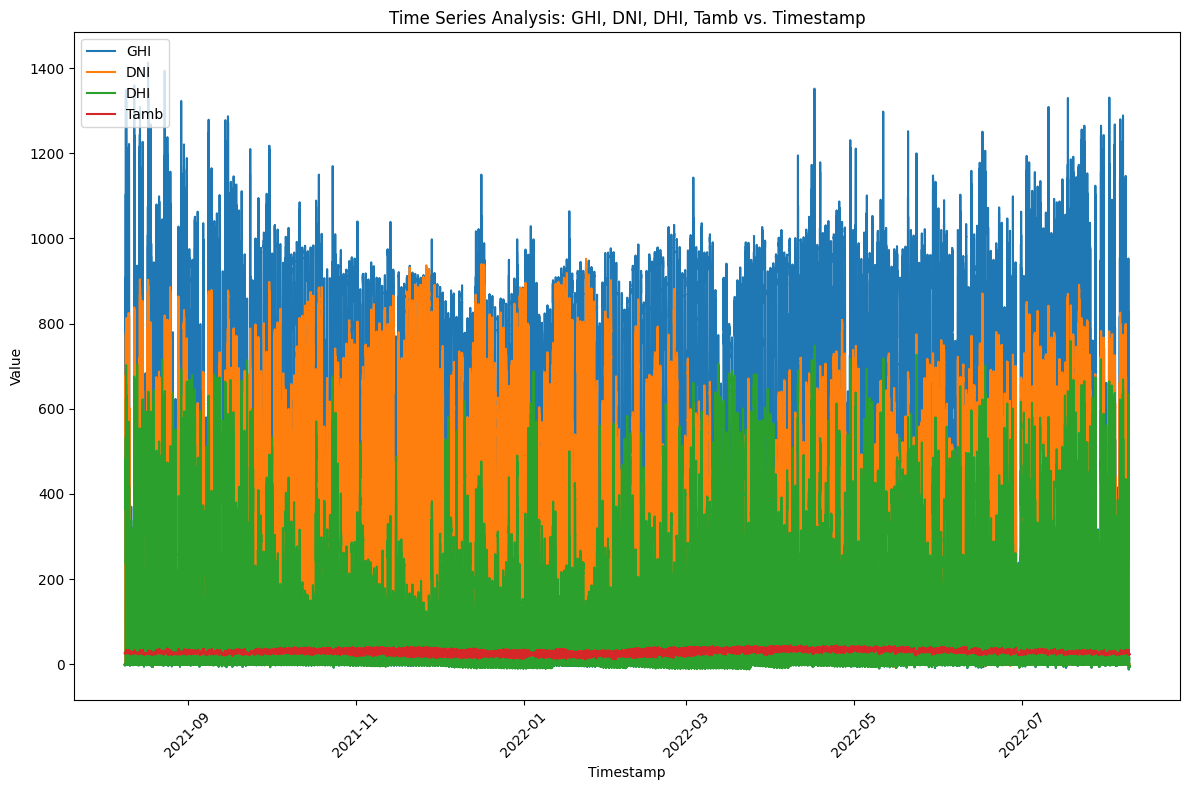

Observe patterns by month, trends throughout the day, or anomalies such as peaks in solar irradiance or temperature fluctuations.


In [22]:
# Cell 4: Time Series Analysis
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index
df.set_index('Timestamp', inplace=True)

# Line plots for GHI, DNI, DHI, Tamb
plt.figure(figsize=(12, 8))
for column in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df.index, df[column], label=column)
plt.title('Time Series Analysis: GHI, DNI, DHI, Tamb vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend(loc='upper left')  # Explicitly set legend location
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observe patterns (manual inspection recommended)
print("Observe patterns by month, trends throughout the day, or anomalies such as peaks in solar irradiance or temperature fluctuations.")

<Figure size 1000x600 with 0 Axes>

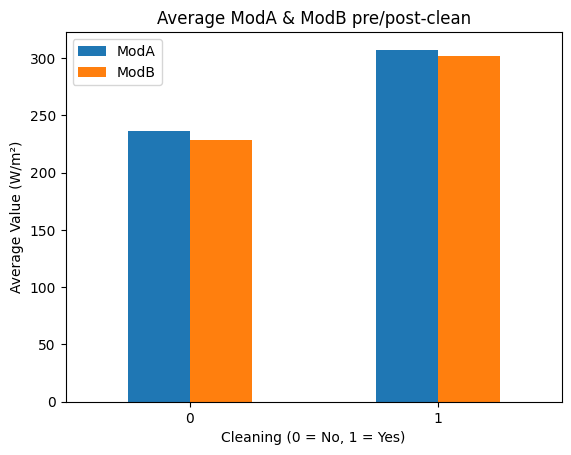

In [9]:
# Cell 5: Cleaning Impact
# Group by Cleaning flag and plot average ModA & ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

plt.figure(figsize=(10, 6))
cleaning_impact.plot(x='Cleaning', y=['ModA', 'ModB'], kind='bar', title='Average ModA & ModB pre/post-clean')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Value (W/m²)')
plt.xticks(rotation=0)
plt.legend(['ModA', 'ModB'])
plt.show()

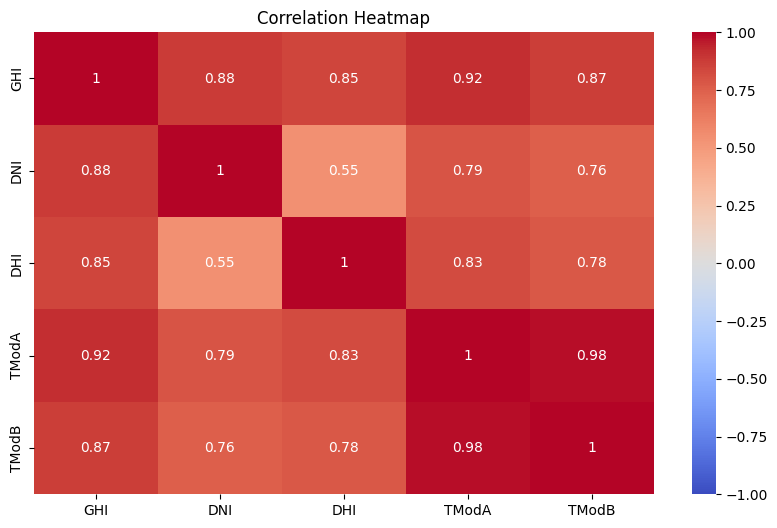

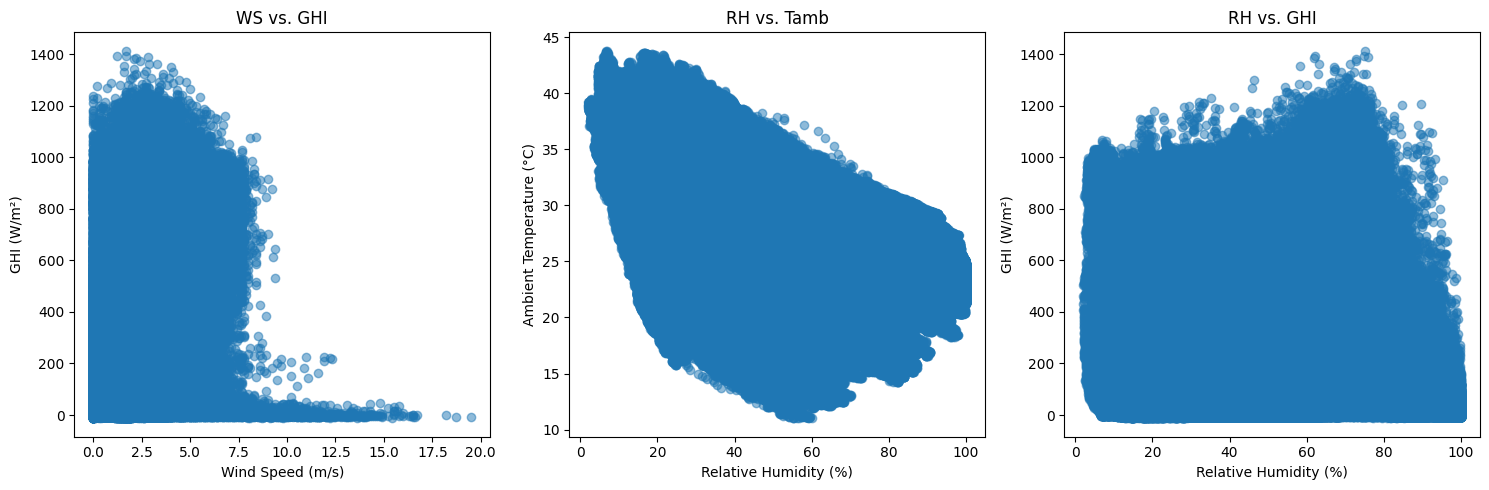

In [10]:
# Cell 6: Correlation & Relationship Analysis
# Heatmap of correlations
plt.figure(figsize=(10, 6))
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.title('WS vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')

plt.subplot(1, 3, 2)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')

plt.subplot(1, 3, 3)
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.title('RH vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()

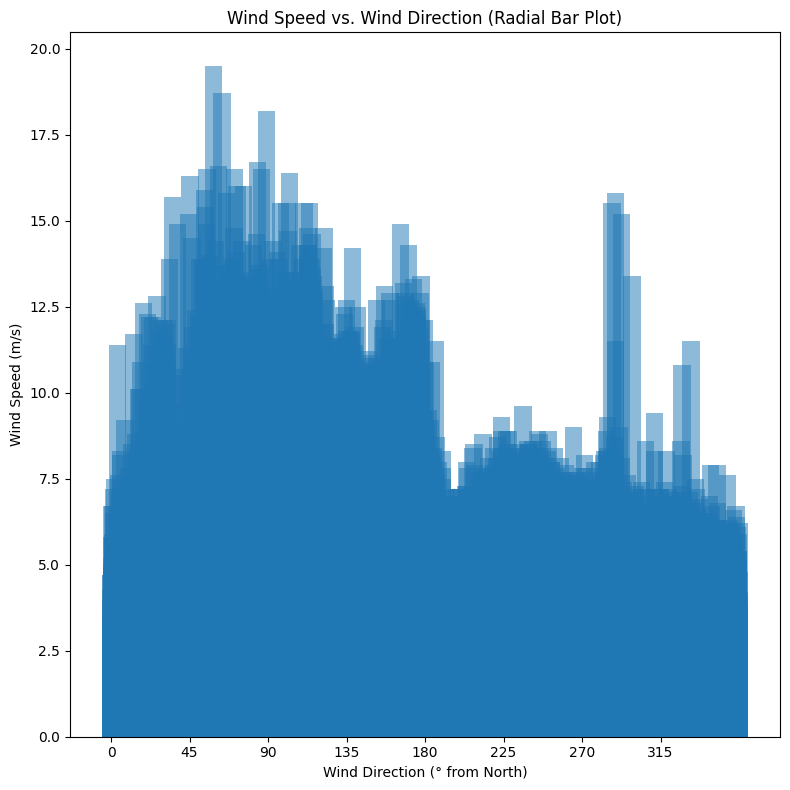

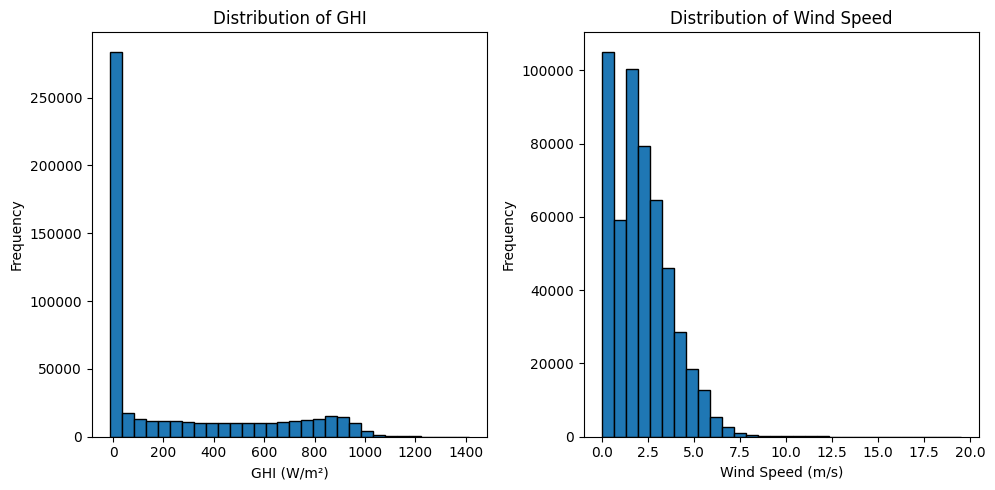

In [11]:
# Cell 7: Wind & Distribution Analysis
# Wind rose (requires additional library like windrose)
# For simplicity, use a radial bar plot
plt.figure(figsize=(8, 8))
plt.bar(df['WD'], df['WS'], width=10, align='center', alpha=0.5)
plt.title('Wind Speed vs. Wind Direction (Radial Bar Plot)')
plt.xlabel('Wind Direction (° from North)')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(np.arange(0, 360, 45))
plt.tight_layout()
plt.show()

# Histogram for GHI and WS
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, edgecolor='black')
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, edgecolor='black')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

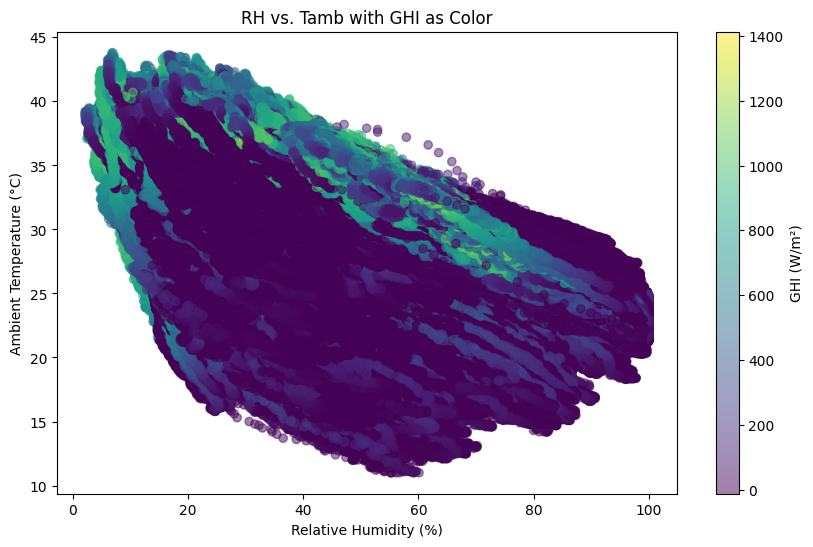

Examine how RH might influence temperature readings and solar radiation.


In [12]:
# Cell 8: Temperature Analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['RH'], df['Tamb'], c=df['GHI'], cmap='viridis', alpha=0.5)
plt.title('RH vs. Tamb with GHI as Color')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.colorbar(label='GHI (W/m²)')
plt.show()
print("Examine how RH might influence temperature readings and solar radiation.")

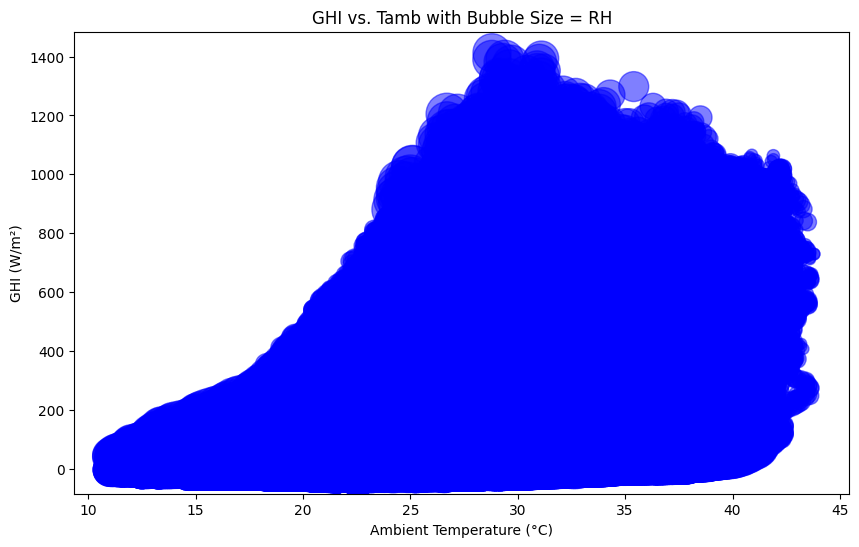

In [13]:
# Cell 9: Bubble Chart
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5, c='blue')
plt.title('GHI vs. Tamb with Bubble Size = RH')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.show()